# 주제 : 미국의 대통령은 어떻게 뽑힐까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 US Election 2020 데이터셋을 사용합니다.
    
    - 총 11개의 파일 중 정보가 가장 많은 2개의 파일을 사용합니다.
    president_county_candidate.csv: 대통령 투표 결과
    governors_county_candidate.csv: 카운티 지사 투표 결과
    
    - 총 1개의 보조 데이터를 이용합니다.
    acs2017_county_data.csv: 카운티별 인구조사 데이터
    
    - 각 파일의 컬럼은 아래와 같습니다.
    state: 주
    county: 카운티(군)
    district: 지구
    candidate: 후보자
    party: 후보자의 소속 정당
    total_votes: 득표 수
    won: 지역 투표 우승 여부
    
    
    
- 데이터 출처: https://www.kaggle.com/unanimad/us-election-2020
- 보조 데이터: https://www.kaggle.com/muonneutrino/us-census-demographic-data
- 어떤 특성이 투표결과를 어떻게 했나는 따로 정보를 삽입할 필요가 있다

## 최종 목표
    - 보조 데이터셋을 이용하여 데이터셋 보강하는 방법 이해
    - plotly를 이용한 Choropleth 시각화 방법 이해
    - Regression과 Classification의 차이 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터에 관한 사전 배경 지식

### 미국의 선거 제도에 대하여
여러 지역을 카운티 별로 쪼개고 더많은 카운티에서 지지를 얻은 후보가 대통령으로 선발이 됨
지자체장(county governor) 뽑는 선거, 상원 하원을 각각뽑는 선거, 대통령 선거가 있다

### 2020 미국 선거 데이터셋 설명
선거당시 투표결과를 실시간 업데이트 하고있었다 (current vote 랑 total vote중 total vote만 쓰면됨)
각 카운티별로 대통령 상원하원,카운티고버너 선거에 대한 데이터가 있다(정당,투표수, 당선여부)


### 2017 미국 인구조사 데이터셋(보조 데이터셋) 설명
투표당시 인종, 성별, 나이, 수입, 빈곤지수, 전문직, 출퇴근방법, 취업률 등등에 대한 정보를 담고있다.

## Step 1. 데이터셋 준비하기

In [1]:
!pip install geopandas == 0.9.0
!pip install pyshp == 2.1.3
!pip install shapely == 1.7.1
!pip install plotly-geo == 1.0.0

     |████████████████████████████████| 994 kB 19.3 MB/s 
     |████████████████████████████████| 6.3 MB 57.6 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 219 kB 28.6 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=592bc7cd82e9b29a8c3c1e09e1d80a48d2b9cbd28ca26cb56f5c6470eeeb4d9a
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
     |████████████████████████████████| 23.7 MB 56 kB/s 


In [2]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [118]:
import os

In [119]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = 'e808743bea20e4a89b105256b9d5941b'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [120]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data
!unzip '*.zip'




us-election-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
us-census-demographic-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-census-demographic-data.zip
replace acs2015_census_tract_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: acs2015_census_tract_data.csv  
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace acs2015_county_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [121]:
# from US Election 2020
df_gov = pd.read_csv('governors_county_candidate.csv')
df_pres = pd.read_csv('president_county_candidate.csv')
#상/하원 선거데이터는 좀 복잡하므로 위 두개만 갖고 해본다

# from US Census 2017
df_census = pd.read_csv('acs2017_county_data.csv')

In [122]:
# State Code 관련 부가 자료 #각 주의 약자나 우편코드를 써놨다
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임 구조 및 기초 통계 확인하기


In [123]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
#df_pres
#df_pres['candidate'].unique() #어떤 후보가 있나 봐봄 -> 바이든과 트럼프만 보고 한다
#df_pres['candidate'].value_counts() #'Write-ins' : 선거지에 이름이 없어 직접 수기로 후보자이름을 작성한 투표
df_pres.loc[df_pres['candidate']=='Joe Biden']['total_votes'].sum() #칸예가 받은 투표 총 수

82046434

In [124]:
df_gov.head() #df_pres와 같은 구조-> 정당 별로 본다 ('DEM'과 'REP')

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [125]:
df_census.head() #총인구수, 성별,은 숫자(인구수)로 적혀있지만, 인종,빈곤률등은 퍼센트로 나눠져있다 -> 퍼센트로 되어있는건 단순히 합쳐서 평균을 내면 안된다 -> 총인구수를 통해 인종별 인구수를 따로 구해야할지도
# Income 보다 IncomePerCap을 쓰는게 더 좋을지도
df_census[df_census['County']=='Hillsborough County']#각 카운티별 데이터 갯수 -> 이름이 같은 카운티의 갯수

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
347,12057,Florida,Hillsborough County,1351087,658639,692448,27.4,50.3,15.5,0.2,3.9,0.1,937597,53742,533,29806,267,15.7,21.2,38.4,17.9,26.5,8.6,8.6,80.1,8.8,1.5,1.5,1.9,6.2,27.3,647075,83.7,11.7,4.5,0.1,6.8
1769,33011,New Hampshire,Hillsborough County,406371,201775,204596,6.3,85.7,2.1,0.1,3.8,0.0,303819,75777,1259,37622,461,8.6,10.9,41.4,15.1,24.5,7.9,11.1,81.5,8.4,0.8,2.2,1.0,6.1,27.9,219781,83.2,11.2,5.5,0.1,4.8


In [126]:
  state_code.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### 문제 5. County 별 통계로 데이터프레임 구조 변경하기


In [127]:
# 모든 데이터프레임의 index를 County로 변경하기
data = df_pres.loc[df_pres['party'].apply(lambda s: str(s) in ['DEM','REP'])] #'dem','rep' 정당만 남기도 자 없앰
table_pres = pd.pivot_table(data=data, index=['state','county'], columns = 'party', values = 'total_votes')
table_pres
table_pres.isna().sum()


party
DEM    0
REP    0
dtype: int64

In [128]:
table_pres.rename({'DEM': 'Pres_DEM', 'REP': 'Pres_REP'},axis = 1, inplace = True)
table_pres

party                      Pres_DEM  Pres_REP
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

In [129]:
data2 = df_gov.loc[df_gov['party'].apply(lambda s: str(s) in ['DEM','REP'])] #'dem','rep' 정당만 남기도 자 없앰
table_gov = pd.pivot_table(data=data2, index=['state','county'], columns = 'party', values = 'votes')
table_gov
#table_gov.isna().sum()


party                               DEM    REP
state         county                          
Delaware      Kent County         44352  39332
              New Castle County  191678  82545
              Sussex County       56873  68435
Indiana       Adams County         2143   9441
              Allen County        53895  98406
...                                 ...    ...
West Virginia Webster County        659   2552
              Wetzel County        1727   4559
              Wirt County           483   1947
              Wood County          9933  26232
              Wyoming County       1240   6941

[1025 rows x 2 columns]

In [130]:
table_gov.rename({'DEM': 'Gov_DEM','REP': 'Gov_REP'},axis = 1, inplace = True)
table_gov

party                            Gov_DEM  Gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

In [131]:
#이미 카운티별로 데이터가 나눠져있음
df_census.rename({'State': 'state', 'County': 'county'}, axis = 1, inplace = True) #소문자로 바꿔줌

In [132]:
df_census.drop('CountyId', axis = 1,inplace = True) #countyid 필요없으니까 뺌
df_census.set_index(['state','county'], inplace = True) # 아까 위에서만든 구조와 같은 구조로 만듬

In [133]:
df_census

TotalPop    Men  ...  FamilyWork  Unemployment
state       county                                ...                          
Alabama     Autauga County          55036  26899  ...         0.1           5.2
            Baldwin County         203360  99527  ...         0.1           5.5
            Barbour County          26201  13976  ...         0.3          12.4
            Bibb County             22580  12251  ...         0.3           8.2
            Blount County           57667  28490  ...         0.1           4.9
...                                   ...    ...  ...         ...           ...
Puerto Rico Vega Baja Municipio     54754  26269  ...         0.2          16.8
            Vieques Municipio        8931   4351  ...         0.0          12.8
            Villalba Municipio      23659  11510  ...         0.2          24.8
            Yabucoa Municipio       35025  16984  ...         0.0          25.4
            Yauco Municipio         37585  18052  ...         0.0          24.0

[3220 rows x 34 columns]

In [134]:
df_census.drop(['Income', 'IncomeErr', 'IncomePerCapErr'], axis = 1, inplace = True) #쓰기 애매한 애들 뺌
# Men, Women은 인구수로 되어있지만, 총인구수 대비 비율로 낮춰줌 (인구수가크면 남녀 인구수도 큼 -> Multicollinearity 문제가 생길 수 있음)

In [135]:
df_census.drop('Women', axis = 1, inplace = True) #남녀 둘중 하나만 있어도 두가지 모두를 알 수 있기때문에 그냥 빼줌
df_census['Men'] /= df_census['TotalPop'] 
df_census['VotingAgeCitizen'] /= df_census['TotalPop']
df_census['Employed'] /= df_census['TotalPop']
#여러번 나눠지지 않게 조심하자

In [136]:
df_census.head()

TotalPop       Men  ...  FamilyWork  Unemployment
state   county                              ...                          
Alabama Autauga County     55036  0.488753  ...         0.1           5.2
        Baldwin County    203360  0.489413  ...         0.1           5.5
        Barbour County     26201  0.533415  ...         0.3          12.4
        Bibb County        22580  0.542560  ...         0.3           8.2
        Blount County      57667  0.494043  ...         0.1           4.9

[5 rows x 30 columns]

### 문제 6. 여러 데이터프레임을 하나의 데이터프레임으로 결합하기

In [137]:
# df_pres, df_gov, df_census 데이터프레임을 하나로 결합하기
df = pd.concat([table_pres,table_gov, df_census], axis = 1)



### 문제 7. 컬럼간의 Correlation을 Heatmap으로 표현하기


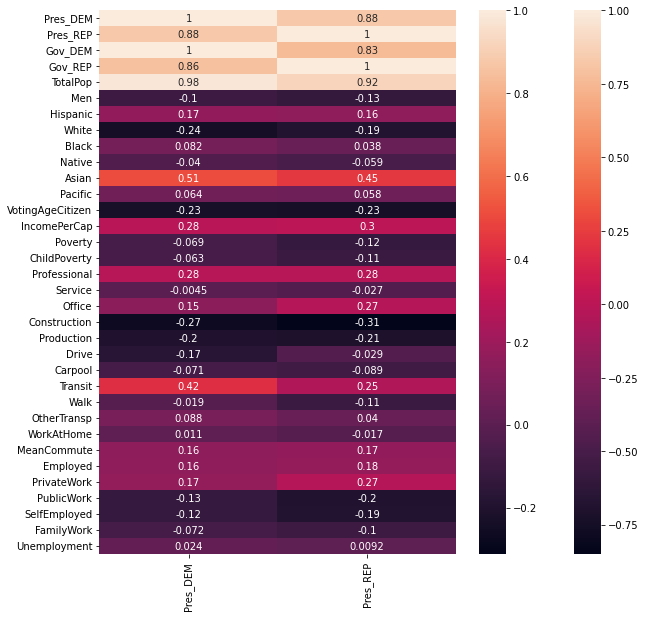

In [138]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize = (10,10))
sns.heatmap(df.corr()) #관심사 각 정당과 그에 투표한 사람들의 관계가 어떨지 생각하며 살펴본다
sns.heatmap(df.corr()[['Pres_DEM','Pres_REP']],annot = True)

#성비는 연관성이 적음
#Asian이 두 정당 모두 높게 나타남 -> 투표율이 높다고 볼 수있음
#정당별로 인구특성에따라 차이가 명확히 보이는게 없음
#Pres_DEM, Pres_REP 간의 상관관계가 엄청 높음 -> 지역 인구별로 나눈거기 때문에 이런 결과가 나온것 -> 정당별 인구비율로 하면 괜찮을것 같다

In [143]:
df_norm = df.copy()

In [144]:
df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Gov_DEM'] /= df['Gov_DEM'] + df['Gov_REP']
df_norm['Gov_REP'] /= df['Gov_DEM'] + df['Gov_REP']

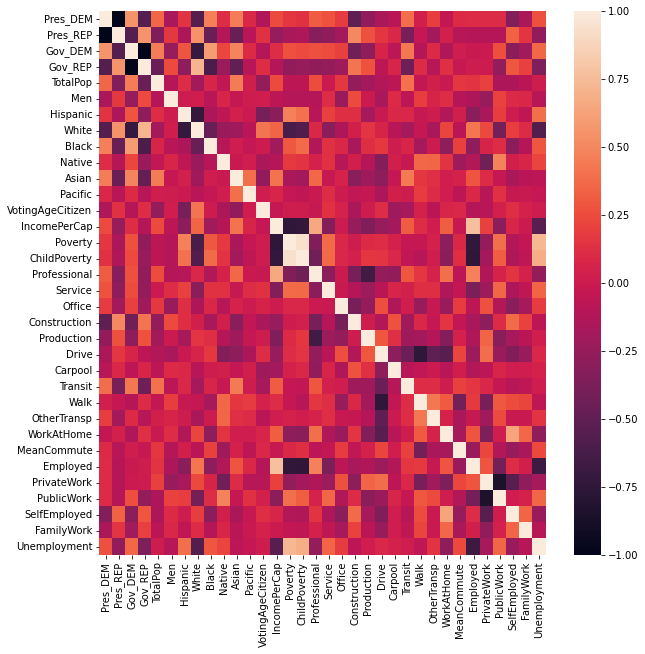

In [145]:

plt.figure(figsize = (10,10))
sns.heatmap(df_norm.corr())

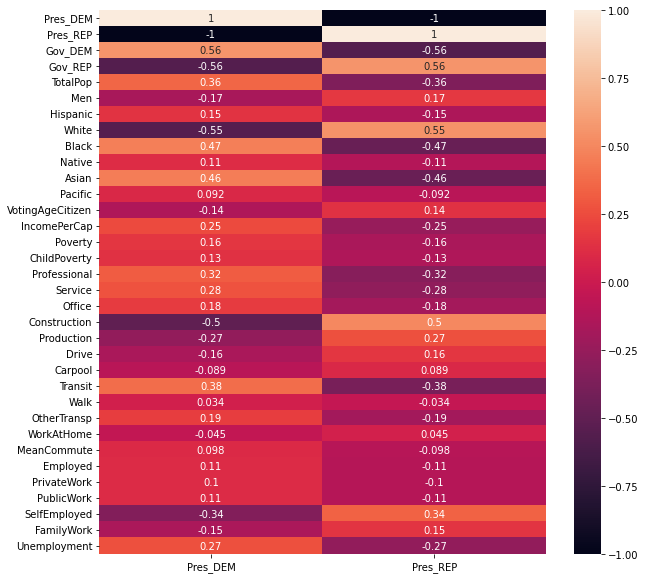

In [146]:
plt.figure(figsize = (10,10))
sns.heatmap(df_norm.corr()[['Pres_DEM','Pres_REP']],annot = True)
#민주당과 공화당의 투표가 서로 상반되게 나옴
#total_pop 인구가 많을수록 민주당을 지지하는 상관성
# 백인이 많은 곳이 공화당을 지지하는 상관성이 높음. 반대로 흑인, 동양인이 많은 지역이 민주당 지지
# 소득이 더 좋은 쪽이 민주당쪽
# 전문직이 더 많은 쪽이 민주당쪽
# 건설업쪽이 공화당쪽
# 실업률이 높은쪽이 민주당 지지

### 문제 8. Seaborn을 이용하여 연관성 높은 데이터의 Jointplot 확인

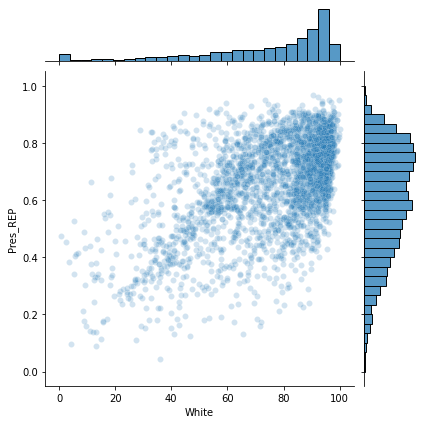

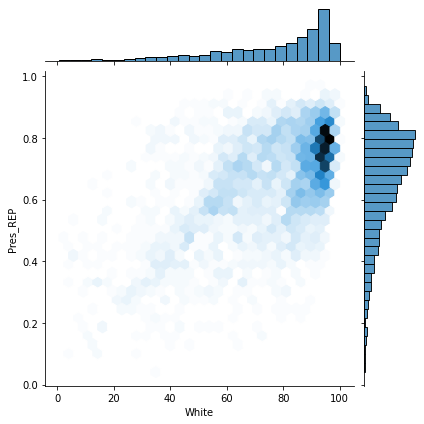

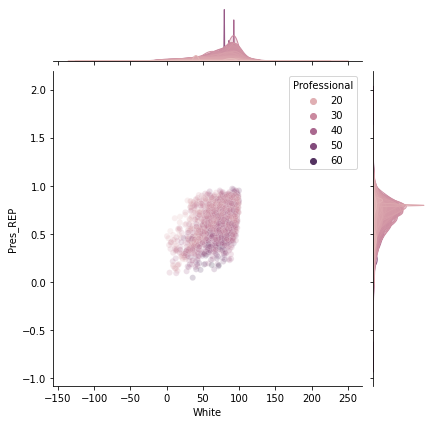

In [150]:
sns.jointplot(x='White',y='Pres_REP', data= df_norm, alpha = 0.2)

sns.jointplot(x='White',y='Pres_REP', data= df_norm, kind = 'hex') #white가 많은 지역이라고 꼭 rep 지지율이 압도적으로 높은건 아님

sns.jointplot(x='White',y='Pres_REP', hue = 'Professional', data= df_norm, alpha = 0.2) #일단 white가 많으면 rep지지율이 높긴하지만 
#위쪽 부분보다 아래쪽 부분이 색이 좀더 진하다. white가 많더라도 전문직수가 높을수록 rep의 지지율이 낮아진다

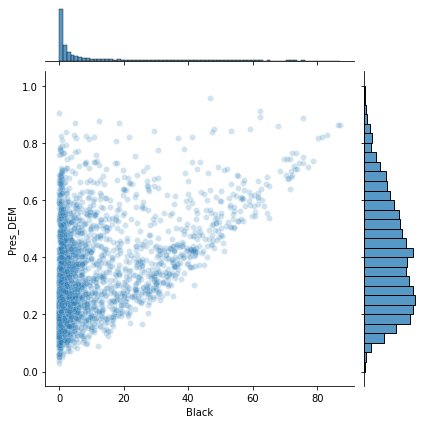

In [153]:
sns.jointplot(x='Black', y ='Pres_DEM', data=df_norm, alpha = 0.2) #black 인구가 높은 county일수록 민주당의 지지율이 높아지는 상관성을 볼 수 있다.
#근데 black 인구 비율이 낮다고 해서 또 민주당 지지율이 낮은건 아니다
#대부분의 county가 black의 비율이 낮아서 한쪽에 몰려있긴함

## Step 3. Plotly를 이용하여 데이터 시각화하기


### 문제 9. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [ ]:
import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

In [ ]:
# ff.create_choropleth()에서 사용할 수 있도록 데이터프레임 정리하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa








### 문제 10. Choropleth map 시각화하기

In [ ]:
# ff.create_choropleth() 메소드를 이용하여 Choropleth 플랏하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa

fig = ff.create_choropleth(...)



fig.layout.template = None
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 학습을 위한 데이터프레임 구성하기

In [ ]:
# 투표 결과에 해당하는 데이터는 입력 데이터에서 제거한다.
# 예측 타겟은 DEM vs. REP 투표 비율로 한다.

X =
y =

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler =
X = 



### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

### 문제 14. PCA를 이용해 데이터 전처리 수행하기

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA를 이용해 Dimensionality Reduction 수행하기
pca =






## Step 4. Regression 모델 학습하기

### 문제 15. LightGBM Regression 모델 학습하기

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# XGBRegressor 모델 생성/학습. Feature에 PCA 적용하기
model_reg = 




### 문제 16. Regression 모델 정확도 출력하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, mean_squared_error, classification_report 결과 출력하기
pred = 





## Step 5. Classification 모델 학습하기


### 문제 17. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_cls = 





### 문제 18. Classifier의 Feature Importance 시각화하기


In [ ]:
# XGBClassifier 모델의 feature_importances_ 속성 시각화





### 문제 19. Classifier 모델 정확도 출력하기

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 



